### Importing the necessary packages

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from linearmodels import PanelOLS
import statsmodels.api as sm

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import MaxNLocator, FuncFormatter

### Reading in the data

In [48]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/final.csv')

In [49]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1,inplace = True) 

### Creating dummy variables and renaming the columns

In [50]:
df = pd.get_dummies(df, columns=['AGE'])

In [51]:
df.rename(columns = {'AGE_15 to 19':'fifteen_nineteen','AGE_20 to 24':'twnty_twntyfour','AGE_25 to 29':'twntyfiv_twntynine','AGE_35 to 39':'thrtyfiv_thrtynine'}, inplace = True)

In [52]:
df = pd.get_dummies(df, columns=['STATE'])

In [53]:
df.columns = df.columns.str.replace(' ','_')

In [54]:
'+'.join(df.columns)

'measure+cause+metric+YEAR+DEATH_RTE+LESS_HS+HS+SOM_COL+COL_PLUS+RTE_CHL+RTE_GON+PRC_BLK+PRC_WHT+PRC_HISP+PRC_OTHER+fifteen_nineteen+twnty_twntyfour+twntyfiv_twntynine+thrtyfiv_thrtynine+STATE_Alabama+STATE_Alaska+STATE_Arizona+STATE_Arkansas+STATE_California+STATE_Colorado+STATE_Connecticut+STATE_Delaware+STATE_District_of_Columbia+STATE_Florida+STATE_Georgia+STATE_Hawaii+STATE_Idaho+STATE_Illinois+STATE_Indiana+STATE_Iowa+STATE_Kansas+STATE_Kentucky+STATE_Louisiana+STATE_Maryland+STATE_Massachusetts+STATE_Michigan+STATE_Minnesota+STATE_Mississippi+STATE_Missouri+STATE_Nebraska+STATE_Nevada+STATE_New_Jersey+STATE_New_Mexico+STATE_New_York+STATE_North_Carolina+STATE_Ohio+STATE_Oklahoma+STATE_Oregon+STATE_Pennsylvania+STATE_Rhode_Island+STATE_South_Carolina+STATE_South_Dakota+STATE_Tennessee+STATE_Texas+STATE_Utah+STATE_Virginia+STATE_Washington+STATE_West_Virginia+STATE_Wisconsin+STATE_Wyoming'

### Baseline OLS model

Notes:

In [106]:
f = 'DEATH_RTE~LESS_HS+HS+SOM_COL+RTE_CHL+RTE_GON+PRC_BLK+PRC_WHT+PRC_HISP+fifteen_nineteen+twnty_twntyfour+twntyfiv_twntynine+thrtyfiv_thrtynine+STATE_Alabama+STATE_Alaska+STATE_Arizona+STATE_Arkansas+STATE_California+STATE_Colorado+STATE_Connecticut+STATE_Delaware+STATE_District_of_Columbia+STATE_Florida+STATE_Georgia+STATE_Hawaii+STATE_Idaho+STATE_Illinois+STATE_Indiana+STATE_Iowa+STATE_Kansas+STATE_Kentucky+STATE_Louisiana+STATE_Maryland+STATE_Massachusetts+STATE_Michigan+STATE_Minnesota+STATE_Mississippi+STATE_Missouri+STATE_Nebraska+STATE_Nevada+STATE_New_Jersey+STATE_New_Mexico+STATE_New_York+STATE_North_Carolina+STATE_Ohio+STATE_Oklahoma+STATE_Oregon+STATE_Pennsylvania+STATE_Rhode_Island+STATE_South_Carolina+STATE_South_Dakota+STATE_Tennessee+STATE_Texas+STATE_Utah+STATE_Virginia+STATE_Washington+STATE_West_Virginia+STATE_Wisconsin'
model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     84.15
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          7.31e-148
Time:                        20:11:47   Log-Likelihood:                -4598.2
No. Observations:                1158   AIC:                             9222.
Df Residuals:                    1145   BIC:                             9288.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            354.1880    208

### Creating a function to iterate through our features one by one to control for age (OLS model) 

Here I test our dependent variable against each of our features

In [18]:
features = ['LESS_HS','HS', 'SOM_COL', 'COL_PLUS', 'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT','PRC_HISP', 'PRC_OTHER']

In [20]:
def OLS(features):
    for feature in features:
        f = 'DEATH_RTE~fifteen_nineteen+twnty_twntyfour+twntyfiv_twntynine+thrtyfiv_thrtynine+'+feature
        model = ols(formula=f, data=df).fit()
        print(model.summary())

In [21]:
OLS(features)

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          2.25e-108
Time:                        11:16:06   Log-Likelihood:                -4710.0
No. Observations:                1158   AIC:                             9430.
Df Residuals:                    1153   BIC:                             9455.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.9168      1

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          4.16e-107
Time:                        11:16:06   Log-Likelihood:                -4713.0
No. Observations:                1158   AIC:                             9436.
Df Residuals:                    1153   BIC:                             9461.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             17.5012      1

### Baseline Fixed Effects Model

In [11]:
#convert year to datetime
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
#add column year to index
df=df.set_index('YEAR', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)

In [14]:
baseline_features = ['LESS_HS',
       'HS', 'SOM_COL', 'COL_PLUS', 'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT',
       'PRC_HISP', 'fifteen_nineteen', 'twnty_twntyfour',
       'twntyfiv_twntynine', 'thrtyfiv_thrtynine']

In [15]:
model_fe = PanelOLS(df.DEATH_RTE, df[baseline_features], entity_effects = True)
fe_res = model_fe.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.4757
Estimator:                   PanelOLS   R-squared (Between):             -0.7271
No. Observations:                1158   R-squared (Within):               0.4757
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.4670
Time:                        10:56:14   Log-likelihood                   -4586.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      85.827
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                 F(12,1135)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             359.51
                            

### Creating a function to iterate through our features one by one to control for age (FE model) 

In [18]:
features = ['LESS_HS', 'HS','SOM_COL', 'COL_PLUS', 'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT','PRC_HISP', 'PRC_OTHER']

In [22]:
def FE(features):
    for feature in features:
        model_fe = PanelOLS(df.DEATH_RTE, df[['fifteen_nineteen', 'twnty_twntyfour','twntyfiv_twntynine', 'thrtyfiv_thrtynine',feature]], entity_effects = True)
        fe_res = model_fe.fit()
        print(fe_res)

In [24]:
FE(features)

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.3575
Estimator:                   PanelOLS   R-squared (Between):              0.0799
No. Observations:                1158   R-squared (Within):               0.3575
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.3554
Time:                        11:26:38   Log-likelihood                   -4703.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      158.97
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                  F(4,1143)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             833.61
                            

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.4258
Estimator:                   PanelOLS   R-squared (Between):             -0.8822
No. Observations:                1158   R-squared (Within):               0.4258
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.4163
Time:                        11:26:38   Log-likelihood                   -4638.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      211.89
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                  F(4,1143)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             966.79
                            

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.3551
Estimator:                   PanelOLS   R-squared (Between):             -0.0452
No. Observations:                1158   R-squared (Within):               0.3551
Date:                Wed, Feb 17 2021   R-squared (Overall):              0.3521
Time:                        11:26:39   Log-likelihood                   -4706.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      157.33
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                  F(4,1143)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             829.48
                            

**Visualizations**

In [31]:
import seaborn as sns

In [26]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/final.csv')

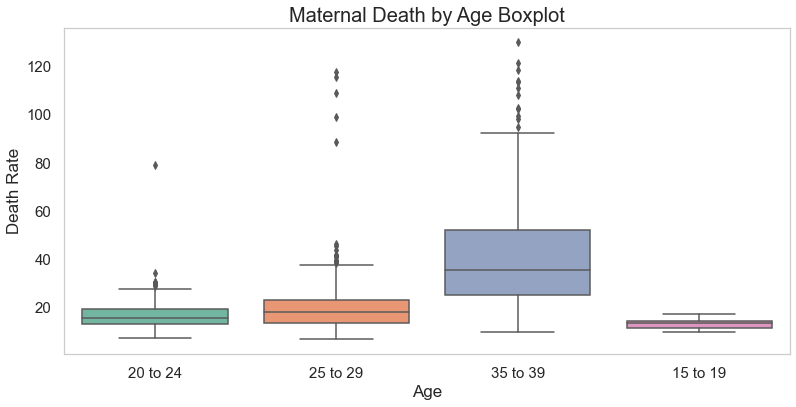

In [38]:
plt.figure(figsize=(13, 6))
fig = sns.boxplot(x=df["AGE"], y=df["DEATH_RTE"], data=df,palette="Set2").set_title('Age')
plt.xlabel("Age",fontsize=17)
plt.ylabel("Death Rate",fontsize=17)
plt.title("Maternal Death by Age Boxplot",fontsize = 20) # You can comment this line out if you don't need title
plt.tick_params(labelsize=15)
plt.grid(False)
plt.show(fig)

**What is this graph showing us?**

We can see that in the age range of 35 to 39 we see that there are a lot of instances of higher mortality rates (aligned with what we see the graph below. 35 to 39 seems to experience a more severe level of outliers in comparison to the other age groups. 

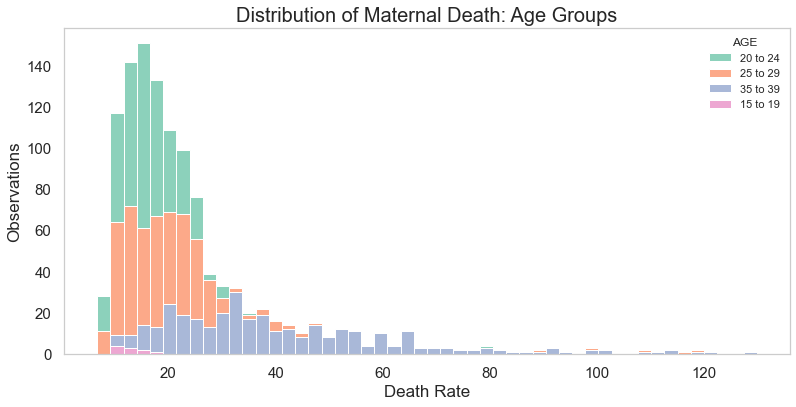

In [37]:
plt.figure(figsize=(13, 6))
fig = sns.histplot(data=df, x="DEATH_RTE", hue="AGE",multiple="stack",palette="Set2")
plt.xlabel("Death Rate",fontsize=17)
plt.ylabel("Observations",fontsize=17)
plt.title("Distribution of Maternal Death: Age Groups",fontsize = 20) # You can comment this line out if you don't need title
plt.tick_params(labelsize=15)
plt.grid(False)
plt.show(fig)

**What is this graph showing us?**

In the graph above we can see that the younger age groups (20-24 & 25-29) experience lower rates of maternal mortality. We can see that the older age groups (35-39) experience higher rates of maternal mortality. This is expected because pregnancy because riskier as a woman ages. Women in their 30s are more at risk for events such as ectopic pregnancy.

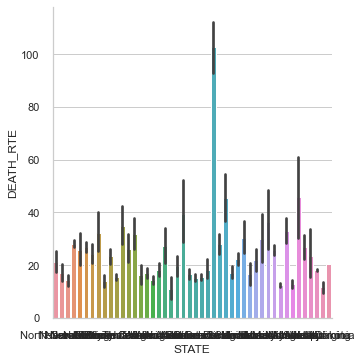

In [41]:
sns.catplot(x="STATE", y="DEATH_RTE", kind="bar", data=df)